In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd

import math
import scipy.stats as scs
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [3]:
# input
market = "SPY"
symbol = 'JPM'
start = '2016-01-01'
end = '2022-06-01'

# Read data 
data = yf.download(symbol,start,end)
stock_market = yf.download(market, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime

def days_between(start, end):
    start = datetime.strptime(start, "%Y-%m-%d")
    end = datetime.strptime(end, "%Y-%m-%d")
    n = abs((end - start).days)
    return n

days_between(start, end)

2343

In [5]:
start = datetime.strptime(start, "%Y-%m-%d")
end = datetime.strptime(end, "%Y-%m-%d")
n = abs((end - start).days)

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,63.950001,64.059998,63.009998,63.619999,53.088226,25393200
2016-01-05,63.700001,64.129997,63.040001,63.730000,53.180023,16566700
2016-01-06,62.720001,63.130001,62.340000,62.810001,52.412327,22961500
2016-01-07,61.459999,62.000000,60.080002,60.270000,50.292789,27630900
2016-01-08,61.130001,61.270000,58.849998,58.919998,49.166267,22373300


In [7]:
stock_market.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004,178.782700,222353500
2016-01-05,201.399994,201.899994,200.050003,201.360001,179.085098,110845800
2016-01-06,198.339996,200.059998,197.600006,198.820007,176.826065,152112600
2016-01-07,195.330002,197.440002,193.589996,194.050003,172.583710,213436100
2016-01-08,195.190002,195.850006,191.580002,191.919998,170.689346,209817200


In [8]:
rf = 0.01

In [9]:
close_px = data[ 'Adj Close']
returns = close_px.pct_change().dropna()

In [10]:
p = np.array(data['Adj Close'])
mp = np.array(stock_market['Adj Close']) 

dollar_vol = np.array(data['Volume']*p)
market_dollar_vol = np.array(stock_market['Volume']*mp)

In [11]:
benchmark = stock_market['Adj Close'].pct_change().dropna()
excess_returns = np.array(returns) - np.array(benchmark)

In [12]:
data['returns'] = data[ 'Adj Close'].pct_change().dropna()
benchmark['returns'] = stock_market['Adj Close'].pct_change().dropna()

In [13]:
data['rea_var'] = 252 * np.cumsum(data['returns']**2) / np.arange(len(data))
data['rea_vol'] = np.sqrt(data['rea_var'])

In [14]:
def adj_close_statistics(close_px):
    sta = scs.describe(close_px)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

adj_close_statistics(close_px)    

     statistic           value
------------------------------
          size      1614.00000
           min        44.28468
           max       168.01387
          mean       100.45823
           std        31.02340
          skew         0.34607
      kurtosis        -0.58353


In [15]:
def print_stock_statistics(data):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily  Log Returns %9.6f" % np.mean(returns))
    print("Std  of Daily  Log Returns %9.6f" % np.std(returns))
    print("Mean of Annua. Log Returns %9.6f" % (np.mean(returns) * 252))
    print("Std  of Annua. Log Returns %9.6f" % (np.std(returns) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(returns))
    print("Skew Normal Test p-value   %9.6f" % scs.skewtest(returns)[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(returns))
    print("Kurt Normal Test p-value   %9.6f" % \
                scs.kurtosistest(returns)[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" % \
                scs.normaltest(returns)[1])
    print("---------------------------------------------")
    print("Realized Volatility        %9.6f" % data['rea_vol'].iloc[-1])
    print("Realized Variance          %9.6f" % data['rea_var'].iloc[-1])
    print("---------------------------------------------")
    print("Anderson Normality Test:		   ")
    print(stats.anderson(returns))
    print("---------------------------------------------")
    print("Shapiro_Wilk Test: 		      			")
    print(stats.shapiro(returns))
    print("Sharpe Ratio of Daily Returns:  			")
    print("{0:.8f}".format(np.mean(returns) / np.std(returns)))
    print("Trading Sharpe for Daily:      			")
    print("{0:.8f}".format((n*6.5) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(n*6.5))))
    print("Sharpe of Annua. Returns w/ days:      	")
    print("{0:.8f}".format((252) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(252))))
    print("Sharpe of Annua. Returns w/ days & hours:")
    print("{0:.8f}".format((252*6.5) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(252*6.5))))
    print("---------------------------------------------")
    print("Amihud Illiquidity 		  %9.6g" % np.mean(np.divide(abs(returns),dollar_vol[1:])))
    print("---------------------------------------------")
    print("Kelly Formula:			       ")
    print("{0:.8f}".format(np.mean(returns) - rf // (np.std(returns))**2))
    print("Compounded Levered Return: 	   ")
    print("{0:.8f}".format(rf + (((252) * (np.mean(returns)-rf / np.std(returns)*np.sqrt(252)))**2) // 2))
    print("Compounded Unlevered Return:    ")
    print("{0:.8f}".format(((np.mean(returns))*252)-(((np.std(returns))*np.sqrt(252))**2) // 2))
    return

def print_stock_statistics(data):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily  Log Returns %9.6f" % np.mean(returns))
    print("Std  of Daily  Log Returns %9.6f" % np.std(returns))
    print("Mean of Annua. Log Returns %9.6f" % (np.mean(returns) * 252))
    print("Std  of Annua. Log Returns %9.6f" % (np.std(returns) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(returns))
    print("Skew Normal Test p-value   %9.6f" % scs.skewtest(returns)[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(returns))
    print("Kurt Normal Test p-value   %9.6f" % \
                scs.kurtosistest(returns)[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" % \
                scs.normaltest(returns)[1])
    print("---------------------------------------------")
    print("Realized Volatility        %9.6f" % data['rea_vol'].iloc[-1])
    print("Realized Variance          %9.6f" % data['rea_var'].iloc[-1])
    print("---------------------------------------------")
    print("Anderson Normality Test:		   ")
    print(stats.anderson(returns))
    print("---------------------------------------------")
    print("Shapiro_Wilk Test: 		      			")
    print(stats.shapiro(returns))
    print("Sharpe Ratio of Daily Returns:  			")
    print("{0:.8f}".format(np.mean(returns) / np.std(returns)))
    print("Trading Sharpe for Daily:      			")
    print("{0:.8f}".format((n*6.5) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(n*6.5))))
    print("Sharpe of Annua. Returns w/ days:      	")
    print("{0:.8f}".format((252) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(252))))
    print("Sharpe of Annua. Returns w/ days & hours:")
    print("{0:.8f}".format((252*6.5) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(252*6.5))))
    print("---------------------------------------------")
    print("Amihud Illiquidity 		  %9.6g" % np.mean(np.divide(abs(returns),dollar_vol[1:])))
    print("---------------------------------------------")
    print("Kelly Formula:			       ")
    print("{0:.8f}".format(np.mean(returns) - rf // (np.std(returns))**2))
    print("Compounded Levered Return: 	   ")
    print("{0:.8f}".format(rf + (((252) * (np.mean(returns)-rf / np.std(returns)*np.sqrt(252)))**2) // 2))
    print("Compounded Unlevered Return:    ")
    print("{0:.8f}".format(((np.mean(returns))*252)-(((np.std(returns))*np.sqrt(252))**2) // 2))
    return

print_stock_statistics(data)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000731
Std  of Daily  Log Returns  0.018514
Mean of Annua. Log Returns  0.184324
Std  of Annua. Log Returns  0.293907
---------------------------------------------
Skew of Sample Log Returns  0.373762
Skew Normal Test p-value    0.000000
---------------------------------------------
Kurt of Sample Log Returns 14.804034
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------
Realized Volatility         0.294136
Realized Variance           0.086516
---------------------------------------------
Anderson Normality Test:		   
AndersonResult(statistic=35.02343126276355, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
---------------------------------------------
Shapiro_Wilk Test: 		      			
ShapiroResult(statistic

In [16]:
def print_market_information(benchmark):
    print("RETURN BENCHMARK STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily  Log Returns %9.6f" % np.mean(benchmark['returns']))
    print("Std  of Daily  Log Returns %9.6f" % np.std(benchmark['returns']))
    print("Mean of Annua. Log Returns %9.6f" % (np.mean(benchmark['returns']) * 252))
    print("Std  of Annua. Log Returns %9.6f" % (np.std(benchmark['returns']) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(benchmark['returns']))
    print("Skew Normal Test p-value   %9.6f" % scs.skewtest(benchmark['returns'])[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(benchmark['returns']))
    print("Kurt Normal Test p-value   %9.6f" % scs.kurtosistest(benchmark['returns'])[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" % scs.normaltest(benchmark['returns'])[1])
    print("---------------------------------------------")
    print("Anderson Normality Test:		   ")
    print(stats.anderson(benchmark['returns']))
    return

print_market_information(benchmark)

RETURN BENCHMARK STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000585
Std  of Daily  Log Returns  0.011641
Mean of Annua. Log Returns  0.147323
Std  of Annua. Log Returns  0.184791
---------------------------------------------
Skew of Sample Log Returns -0.720951
Skew Normal Test p-value    0.000000
---------------------------------------------
Kurt of Sample Log Returns 15.612336
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------
Anderson Normality Test:		   
AndersonResult(statistic=49.437288987468264, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [17]:
pd.set_option('display.max_rows', None)

def linreg(returns, benchmark):
    X = benchmark
    y = returns
    beta, intercept, r_squared, p_value, std_err = stats.linregress(X, y)
    alpha = np.mean(y) - beta * np.mean(X)
    print("alpha 	= ", alpha)
    print("beta  	= ", beta)
    print("r_squared	= ", r_squared)
    return beta, alpha, r_squared

In [18]:
def print_market_stock(returns, benchmark):
    y = returns
    x = benchmark
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()
    print(results.summary())

In [19]:
# daily quotes and log returns
def quotes_returns(returns):
    ''' Plots quotes and returns. '''
    plt.figure(figsize=(9, 6))
    data['returns'].plot()
    plt.title('Stock Daily Returns')
    plt.ylabel('Daily log returns')
    plt.grid(True)
    plt.axis('tight')

In [20]:
# histogram of annualized daily log returns
def return_histogram(returns):
    ''' Plots a histogram of the returns. '''
    plt.figure(figsize=(9, 5))
    x = np.linspace(min(returns), max(returns), 100)
    plt.hist(np.array(returns), bins=50, normed=True)
    y = dN(x, np.mean(returns), np.std(returns))
    plt.plot(x, y, linewidth=2)
    plt.xlabel('Log Returns')
    plt.ylabel('Frequency/Probability')
    plt.grid(True)


In [21]:
# Q-Q plot of annualized daily log returns
def return_qqplot(returns):
    ''' Generates a Q-Q plot of the returns.'''
    plt.figure(figsize=(9, 5))
    sm.qqplot(returns, line='s')
    plt.grid(True)
    plt.title('Q-Q of Annualized Daily Log Returns')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

In [22]:
# realized volatility
def realized_volatility(returns):
    ''' Plots the realized volatility. '''
    plt.figure(figsize=(9, 5))
    data['rea_vol'].plot()
    plt.title('Stock Volatility')
    plt.ylabel('Realized Volatility')
    plt.grid(True)

alpha 	=  4.043854996324211e-05
beta  	=  1.181983543448711
r_squared	=  0.7431582303253444
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     1987.
Date:                Tue, 26 Jul 2022   Prob (F-statistic):          2.04e-283
Time:                        22:37:32   Log-Likelihood:                 4793.9
No. Observations:                1613   AIC:                            -9584.
Df Residuals:                    1611   BIC:                            -9573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

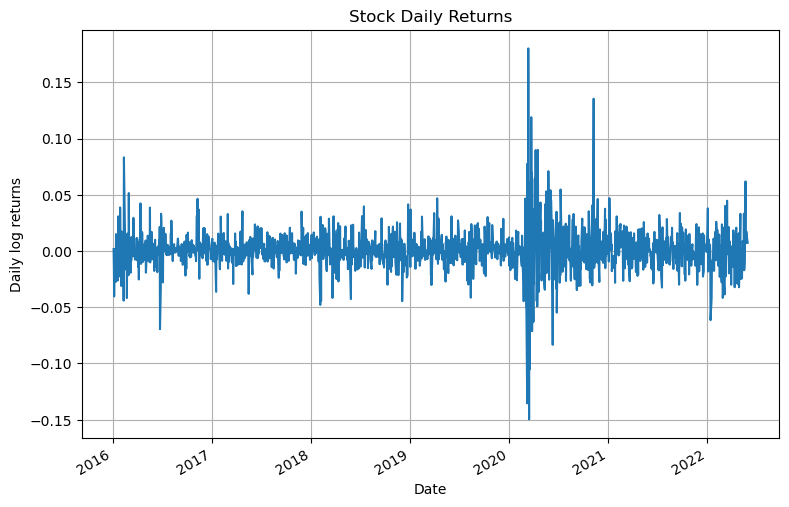

<Figure size 900x500 with 0 Axes>

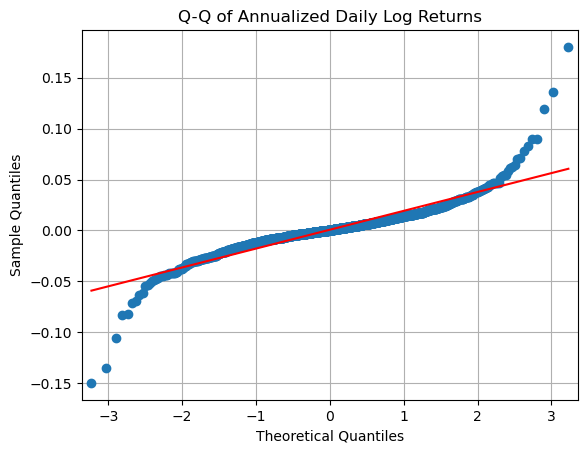

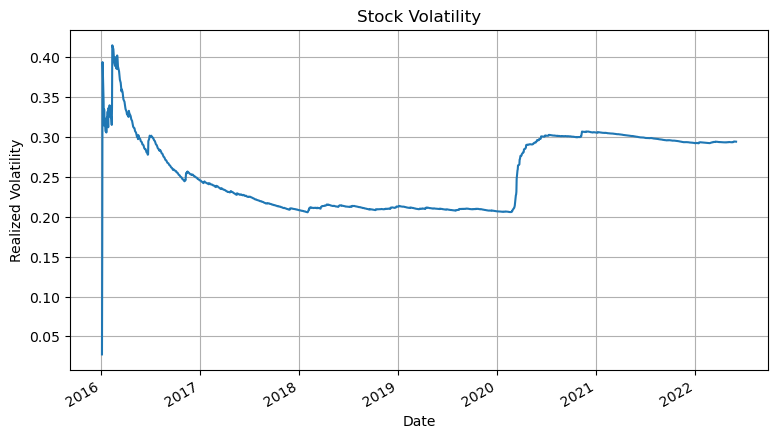

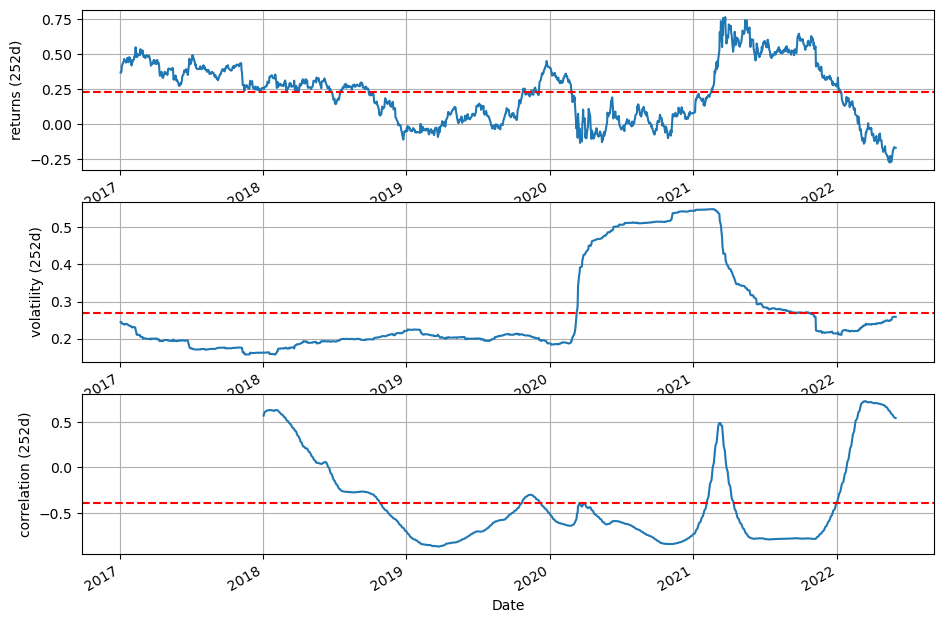

In [23]:
# mean return, volatility and correlation (252 days moving = 1 year)
def rolling_statistics(returns):
    
    ''' Calculates and plots rolling statistics (mean, std, correlation). '''
    plt.figure(figsize=(11, 8))
    
    plt.subplot(311)
    mr = returns.rolling(252).mean() * 252
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns (252d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)

    plt.subplot(312)
    vo = returns.rolling(252).std() * math.sqrt(252)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility (252d)')
    plt.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()

    plt.subplot(313)
    co = mr.rolling(252).corr(vo, 252)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation (252d)')
    cx = plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)

if __name__ == '__main__':
    linreg(returns, benchmark['returns'])
    print_market_stock(returns, benchmark['returns'])
    quotes_returns(returns)
    return_qqplot(returns)
    realized_volatility(returns)
    rolling_statistics(returns)